    Usable both for regression and classification.
    (probably?!? )No need to do feature pre-processing / normalization. Each feature is processed independently and the splitting of the data doesn't depend on the absolute scale of the feature.
    
    Goal: to create a model that makes fewer and fewer mistakes as more trees are added. build a series of shallow trees (weak learners) - where each tree is trained in a nonrandom way, so that it attempts to correct the mistakes of the previous tree in the series.
  
    Parameters (typically tuned together!): 
        - n_estimators (adjusted first to best exploit memory and CPUs during training): number of small trees (weak learners) to be used in ensemble.
        - learning_rate: controls emphasis on fixing errors from previous iteration
        - max_depth. controls the depth of each tree.  typically set to a small value e..g 3-5 for most applications
        - (?!?) random_state: choose a fixed setting if you need reproducible results
        
        - max_features:
            - in RandomForests, default works quite well in practice: 
                -classification ==>  the square root of the total number of features 
                -regression ==> the log base two of the total number of features,  
            - explicitly adjusting max_features may give some additional performance gain 
            - smaller values of max features tending to reduce overfitting. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib.colors import ListedColormap

from adspy_shared_utilities import plot_feature_importances
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


    FRUIT DATASET


In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
print (pd.DataFrame(fruits).info())

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

print (X_fruits.head())
print(y_fruits.head())

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits.values,
                                                                            y_fruits.values,
                                                                            random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None
   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60
3     4.7    6.2    86         0.80
4     4.6    6.0    84         0.79
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [3]:
iris = load_iris()
print(pd.DataFrame(iris.data).info())
print (iris.keys())

print (pd.DataFrame(iris.data).head())
print (pd.DataFrame(iris.target).head())

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, 
                                                                        iris.target, 
                                                                        random_state = 3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   0
0  0
1  0
2  0
3  0
4  0


# GRADIENT BOOSTED DECISION TREE

FRUIT DATASET

<IPython.core.display.Javascript object>


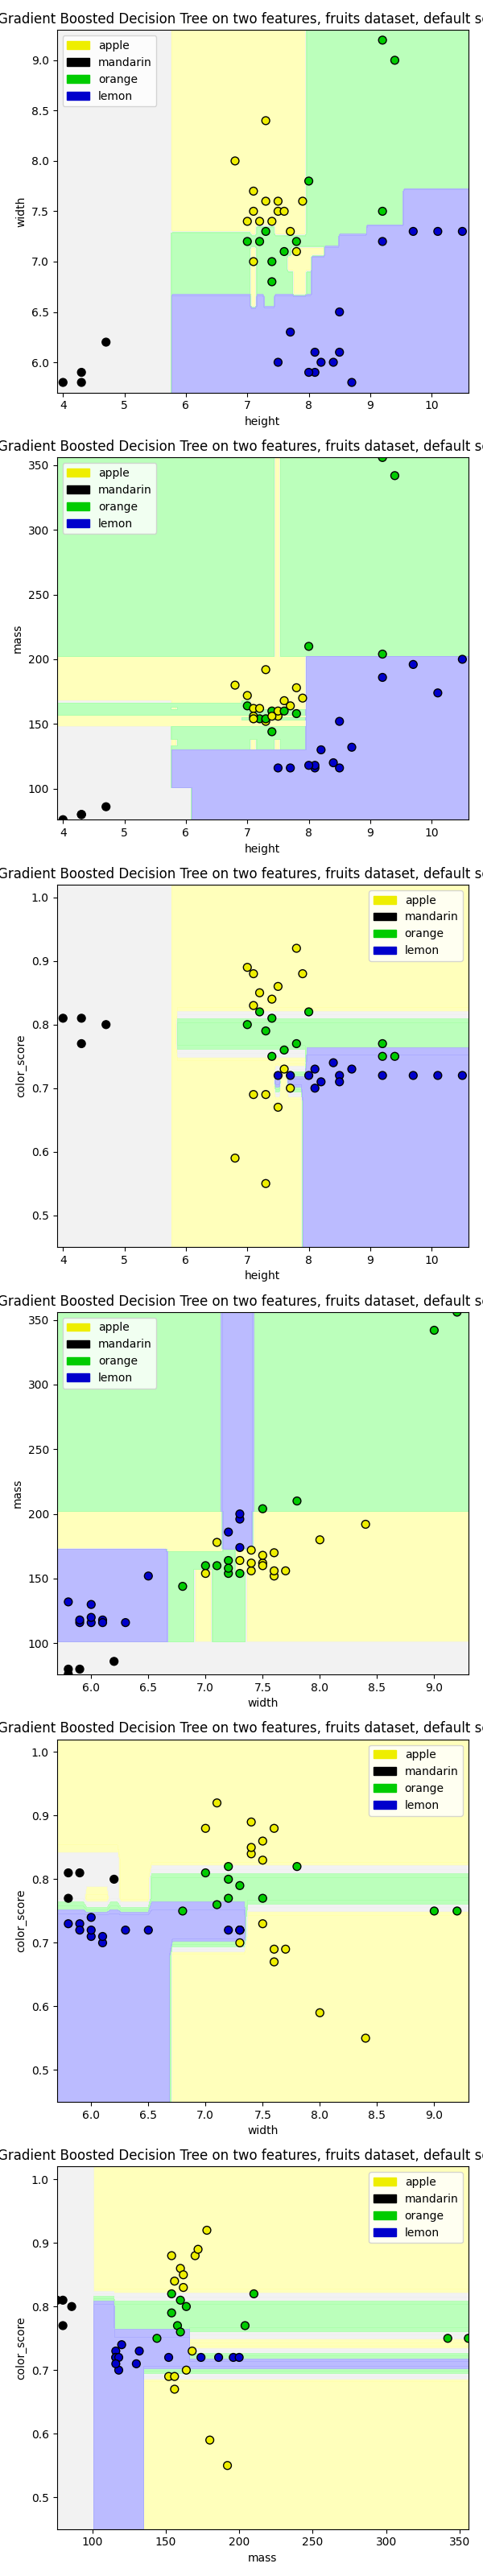

------------------------------------------------------
   feature1_index  feature2_index  train_accuracy  test_accuracy
0               0               1             1.0       0.666667
1               0               2             1.0       0.600000
2               0               3             1.0       0.800000
3               1               2             1.0       0.600000
4               1               3             1.0       0.733333
5               2               3             1.0       0.733333
------------------------------------------------------
GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [4]:
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Gradient Boosted Decision Tree on two features, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

train_test_accuracy = []
for pair, axis in zip(pair_list, subaxes):
    X = X_train_fruit[:, pair]
    y = y_train_fruit
    
    clf = GradientBoostingClassifier().fit(X, y)
    
    # evaluation criteria
    train_accuracy = clf.score(X, y)
    test_accuracy = clf.score(X_test_fruit[:, pair], y_test_fruit)
    train_test_accuracy.append([pair[0], pair[1],  train_accuracy, test_accuracy])
    
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

print ("------------------------------------------------------")
train_test_accuracy_df = pd.DataFrame(train_test_accuracy)
train_test_accuracy_df.columns = ["feature1_index", "feature2_index", "train_accuracy", "test_accuracy"]
print (train_test_accuracy_df)
print ("------------------------------------------------------")


clf = GradientBoostingClassifier().fit(X_train_fruit, y_train_fruit)
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

    Parameters (typically tuned together!): 
    - n_estimators (default 100), adjusted first to best exploit memory and CPUs during training): number of small trees (weak learners) to be used in ensemble. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
    - learning_rate (default 0.1): controls emphasis on fixing errors from previous iteration. Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
    - max_depth. controls the depth of each tree.  typically set to a small value e..g 3-5 for most applications
    - (?!?) random_state: choose a fixed setting if you need reproducible results

In [5]:
# Learning rate shrinks the contribution of each tree by learning_rate. 
# There is a trade-off between learning_rate (default 0.1) and n_estimators (default 100).
clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 200,
                                 learning_rate=0.01, 
                                 max_depth = 3).fit(X_train_fruit, y_train_fruit)
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.87


In [6]:
# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.
# Learning rate shrinks the contribution of each tree by learning_rate. 
# There is a trade-off between learning_rate (default 0.1) and n_estimators (default 100).
clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 150,
                                 learning_rate=0.01, 
                                 max_depth = 3, 
                                 max_features=1).fit(X_train_fruit, y_train_fruit)
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.87


    IRIS DATASET

<IPython.core.display.Javascript object>


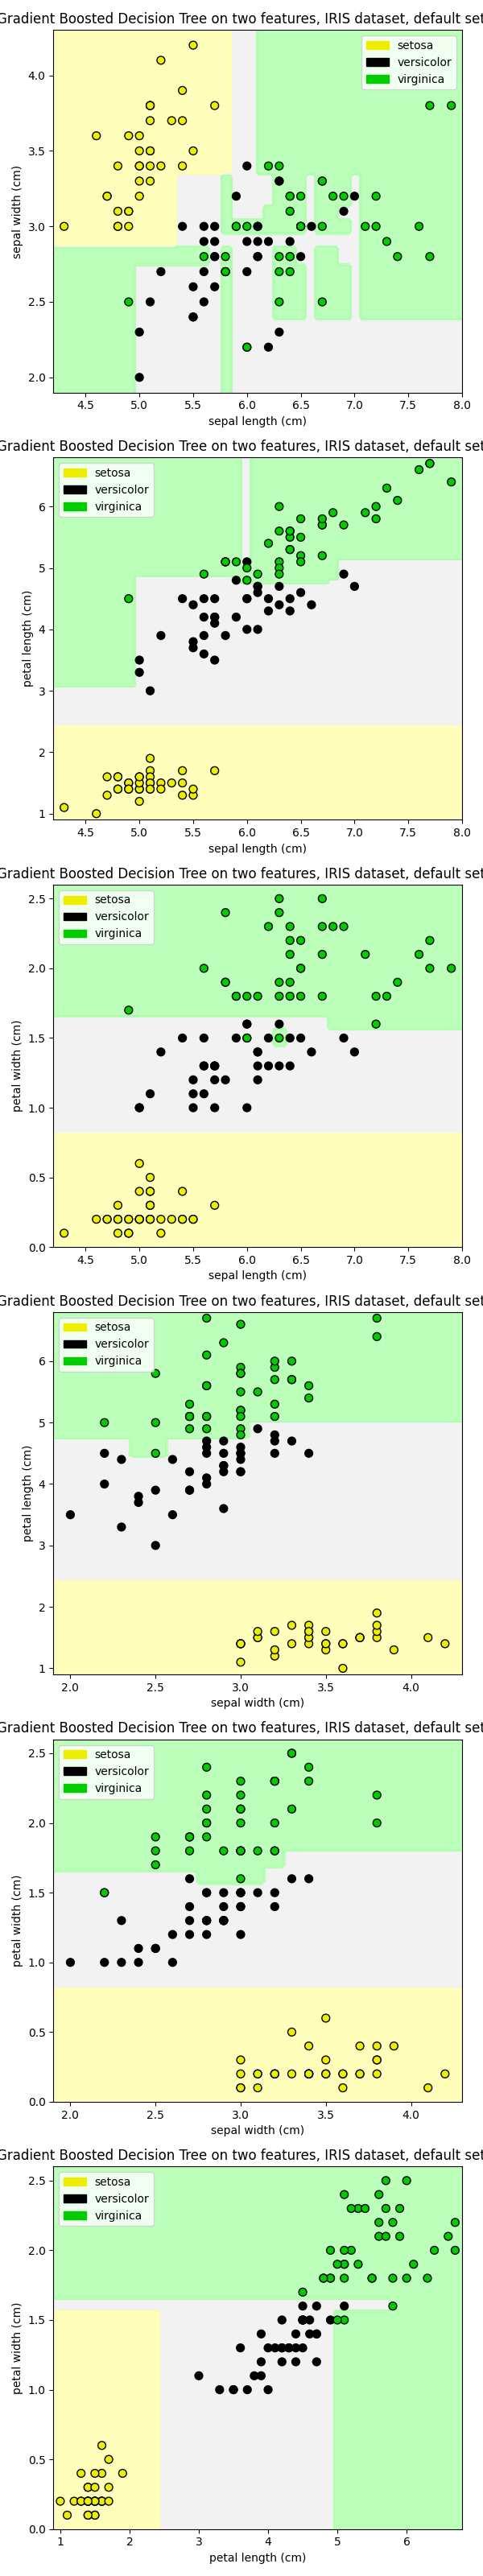

------------------------------------------------------
   feature1_index  feature2_index  train_accuracy  test_accuracy
0               0               1        0.946429       0.605263
1               0               2        1.000000       0.868421
2               0               3        0.982143       0.921053
3               1               2        0.991071       0.921053
4               1               3        0.973214       0.947368
5               2               3        0.991071       0.973684
------------------------------------------------------
GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97


In [7]:
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Gradient Boosted Decision Tree on two features, IRIS dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

train_test_accuracy = []
for pair, axis in zip(pair_list, subaxes):
    X = X_train_iris[:, pair]
    y = y_train_iris
    
    clf = GradientBoostingClassifier().fit(X, y)
    
    # evaluation criteria
    train_accuracy = clf.score(X, y)
    test_accuracy = clf.score(X_test_iris[:, pair], y_test_iris)
    train_test_accuracy.append([pair[0], pair[1],  train_accuracy, test_accuracy])
    
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
   
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

print ("------------------------------------------------------")
train_test_accuracy_df = pd.DataFrame(train_test_accuracy)
train_test_accuracy_df.columns = ["feature1_index", "feature2_index", "train_accuracy", "test_accuracy"]
print (train_test_accuracy_df)
print ("------------------------------------------------------")


clf = GradientBoostingClassifier(random_state = 0).fit(X_train_iris, y_train_iris)
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

In [8]:
clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 200,
                                 learning_rate=0.2, 
                                 max_depth = 3, 
                                 #max_features=1
                                ).fit(X_train_iris, y_train_iris)
print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97


---
 # REAL WORLD DATASET: BREAST CANCER 
    
---

In [9]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print ("Type of data structure: ", type(cancer))
print ("Keys: ", cancer.keys())
print ("Feature names: ", cancer["feature_names"])

# convert to dataframe
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = pd.Series(cancer.target)
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")
print (cancerdf.head(5))

Type of data structure:  <class 'sklearn.utils.Bunch'>
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Distribution of labelled samples: 
malignant    212
benign       357
Name: target, dtype: int64
-------------------------------------------
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.8

In [10]:
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer, y_cancer, random_state = 0)

In [11]:
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train_BC, y_train_BC)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_BC, y_train_BC)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test_BC, y_test_BC)))

clf = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 2, 
                                 random_state = 0)
clf.fit(X_train_BC, y_train_BC)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_BC, y_train_BC)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test_BC, y_test_BC)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


In [12]:
clf = GradientBoostingClassifier(random_state = 0, 
                                 n_estimators = 200,
                                 learning_rate=0.5, 
                                 max_depth = 3, 
                                 max_features=8
                                ).fit(X_train_BC, y_train_BC)

print('Breast cancer dataset')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train_BC, y_train_BC)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test_BC, y_test_BC)))



Breast cancer dataset
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97



In [13]:
clf.get_params(deep = True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

---
Evaluation: train-test accuracy as a function of n_estimators and learning_rate
---

    - n_estimators (adjusted first to best exploit memory and CPUs during training): number of small trees (weak learners) to be used in ensemble.
    - learning_rate: controls emphasis on fixing errors from previous iteration

<IPython.core.display.Javascript object>


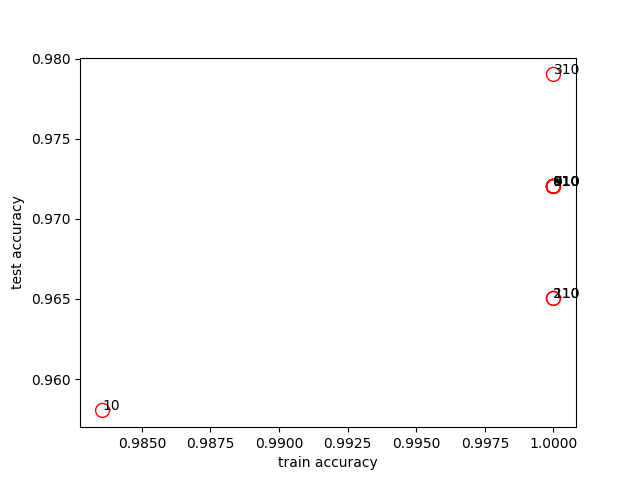

Train-test accuracies for various number of estimator models: 


,10,110,210,310,410,510,610,710,810,910
train_scores,0.983568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test_scores,0.958042,0.965035,0.965035,0.979021,0.972028,0.972028,0.972028,0.972028,0.972028,0.972028


In [14]:
n_estimators_range = np.arange(10, 1000, step = 100)

train_scores = []
test_scores = []

for crt_n_estimators in n_estimators_range:
    clf = GradientBoostingClassifier(random_state = 0, 
                                     n_estimators = crt_n_estimators,
                                     learning_rate=0.1, 
                                     max_depth = 3, 
                                     max_features=8
                                    ).fit(X_train_BC, y_train_BC)
    train_scores.append(clf.score(X_train_BC, y_train_BC))
    test_scores.append(clf.score(X_test_BC, y_test_BC))

plt.figure()
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
plt.scatter(train_scores, test_scores, s= 100, facecolors='none', edgecolors='r')
#plt.xticks([0.96,0.98,1,1.02]);
#plt.yticks([0.96,0.97, 0.98,0.99, 1]);

for i, label in enumerate(n_estimators_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("Train-test accuracies for various number of estimator models: ")
accuracy_df  = pd.DataFrame(np.array ([train_scores, test_scores]))
accuracy_df.columns = n_estimators_range
accuracy_df.index = ["train_scores", "test_scores"]
accuracy_df



<IPython.core.display.Javascript object>


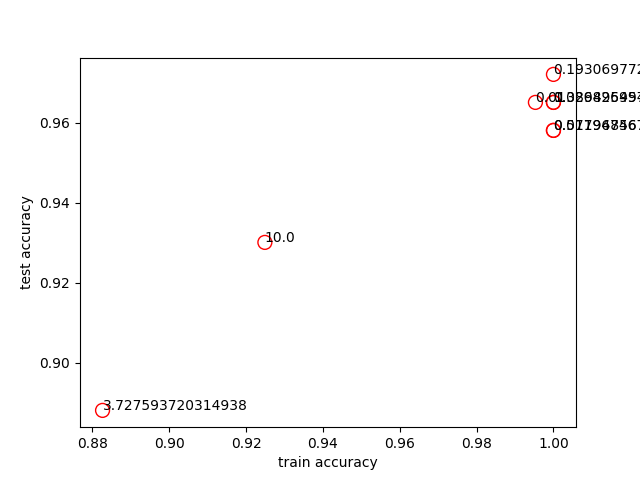

Train-test accuracies for various learning rates: 


,0.010000,0.026827,0.071969,0.193070,0.517947,1.389495,3.727594,10.000000
train_scores,0.995305,1.000000,1.000000,1.000000,1.000000,1.000000,0.882629,0.924883
test_scores,0.965035,0.965035,0.958042,0.972028,0.958042,0.965035,0.888112,0.930070


In [15]:
learning_rate_range = np.logspace (-2,1, base = 10, num = 8)

train_scores = []
test_scores = []

for crt_learning_rate in learning_rate_range:
    clf = GradientBoostingClassifier(random_state = 0, 
                                     n_estimators = 300,
                                     learning_rate=crt_learning_rate, 
                                     max_depth = 3, 
                                     max_features=8
                                    ).fit(X_train_BC, y_train_BC)
    train_scores.append(clf.score(X_train_BC, y_train_BC))
    test_scores.append(clf.score(X_test_BC, y_test_BC))

plt.figure()
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
plt.scatter(train_scores, test_scores, s= 100, facecolors='none', edgecolors='r')
#plt.xticks([0.96,0.98,1,1.02]);
#plt.yticks([0.96,0.97, 0.98,0.99, 1]);

for i, label in enumerate(learning_rate_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("Train-test accuracies for various learning rates: ")
accuracy_df  = pd.DataFrame(np.array ([train_scores, test_scores]))
accuracy_df.columns = learning_rate_range
accuracy_df.index = ["train_scores", "test_scores"]
accuracy_df


    n_estimators = 300, learning_rate = 0.2 seems to perform best

<IPython.core.display.Javascript object>


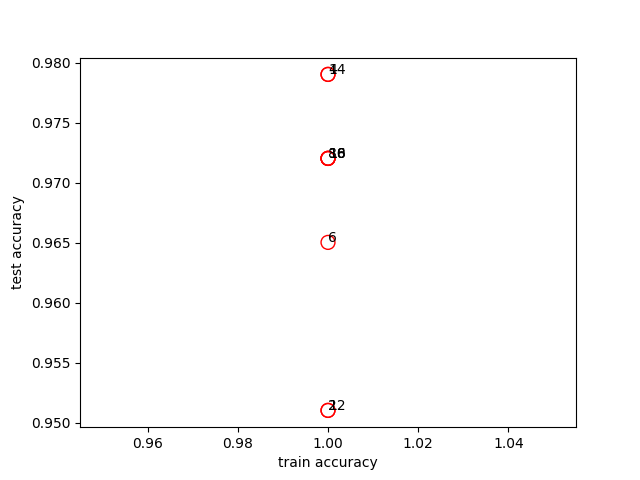

Train-test accuracies for various max_features values: 


,2,4,6,8,10,12,14,16,18
train_scores,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test_scores,0.951049,0.979021,0.965035,0.972028,0.972028,0.951049,0.979021,0.972028,0.972028


In [16]:
#learning_rate_range = np.logspace (-2,1, base = 10, num = 8)
#n_estimators_range = np.arange(10, 1000, step = 100)
max_features_range = np.arange(2, 20, step = 2)

train_scores = []
test_scores = []

for crt_maxfeatures_rate in max_features_range:
    clf = GradientBoostingClassifier(random_state = 0, 
                                     n_estimators = 300,
                                     learning_rate=0.2, 
                                     max_depth = 3, 
                                     max_features=crt_maxfeatures_rate
                                    ).fit(X_train_BC, y_train_BC)
    train_scores.append(clf.score(X_train_BC, y_train_BC))
    test_scores.append(clf.score(X_test_BC, y_test_BC))

plt.figure()
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
plt.scatter(train_scores, test_scores, s= 100, facecolors='none', edgecolors='r')
#plt.xticks([0.96,0.98,1,1.02]);
#plt.yticks([0.96,0.97, 0.98,0.99, 1]);

for i, label in enumerate(max_features_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("Train-test accuracies for various max_features values: ")
accuracy_df  = pd.DataFrame(np.array ([train_scores, test_scores]))
accuracy_df.columns = max_features_range
accuracy_df.index = ["train_scores", "test_scores"]
accuracy_df

max_features = 8 seems ok. 